# Project Title: Sales and Customer Behaviour Insights - Green Cart Ltd 

### Installing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from word2number import w2n

## 1. Load the Data 

In [2]:
# Read the csv file
df_sales = pd.read_csv('sales_data.csv', encoding='unicode_escape')
df_product = pd.read_csv('product_info.csv', encoding='unicode_escape')
df_customer = pd.read_csv('customer_info.csv', encoding='unicode_escape')

#### a. Standardise text formatting using .str.strip(), .str.lower() or .str.title():

In [3]:
df_sales.isnull().sum()

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

In [4]:
df_sales.nunique()

order_id            2997
customer_id          499
product_id            30
quantity               7
unit_price          2140
order_date             1
delivery_status        7
payment_method         5
region                 6
discount_applied       5
dtype: int64

In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2997 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [6]:
duplicates = df_sales[df_sales['order_id'].duplicated(keep=False)]
print(duplicates)

     order_id customer_id product_id quantity  unit_price order_date  \
156   O515400      C00103      P0024        4       44.15   06-07-25   
793   O916245      C00390      P0010        1       24.57   06-07-25   
1461  O515400      C00389      P0027        2       22.04   06-07-25   
2712  O916245      C00070      P0011        3       20.83   06-07-25   

     delivery_status payment_method region  discount_applied  
156        delivered         PayPal   East              0.15  
793          Delayed         PayPal  South              0.10  
1461         Delayed         PayPal  North              0.05  
2712         Delayed  Bank Transfer   West              0.05  


In [6]:
duplicates_c = df_customer[df_c['order_id'].duplicated(keep=False)]
print(duplicates)

     order_id customer_id product_id quantity  unit_price order_date  \
156   O515400      C00103      P0024        4       44.15   06-07-25   
793   O916245      C00390      P0010        1       24.57   06-07-25   
1461  O515400      C00389      P0027        2       22.04   06-07-25   
2712  O916245      C00070      P0011        3       20.83   06-07-25   

     delivery_status payment_method region  discount_applied  
156        delivered         PayPal   East              0.15  
793          Delayed         PayPal  South              0.10  
1461         Delayed         PayPal  North              0.05  
2712         Delayed  Bank Transfer   West              0.05  


In [7]:
null_orders = df_sales[df_sales['order_id'].isna()]
null_orders

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
862,NaN,C00237,P0013,1,39.26,06-07-25,Delayed,Credit Card,West,0.2


## 2. Data Cleaning

### 2.a Standardise text formatting and handling missing values

In [8]:
# Data cleaning for Delivery_Status in Sales_data
df_sales['delivery_status'] = (df_sales["delivery_status"].
                                replace({'delrd' : 'Delivered' ,'delyd' : 'Delayed'}).str.title().str.strip()
                                .fillna('Unknown'))

# Data cleaning for payment_method in Sales_data
df_sales['payment_method'] = (df_sales['payment_method'].
                                replace({'bank transfr' : 'Bank Transfer'}).str.title().str.strip()
                                .fillna('Unknown'))

# Data cleaning for region in Sales_data
df_sales['region'] = df_sales['region'].replace({'nrth':'North'})

# Data cleaning for discount_applied in Sales_data
df_sales['discount_applied'] = df_sales['discount_applied'].fillna(0.0)

#Changing Quantity to integer type and dealing with nulls 
word_to_num = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'ten': 10
}

# Standardize to lowercase and strip spaces
df_sales['quantity'] = df_sales['quantity'].astype(str).str.lower().str.strip()

# Replace word numbers with digits
df_sales['quantity'] = df_sales['quantity'].replace(word_to_num)

df_sales['quantity'] = pd.to_numeric(df_sales['quantity'], errors='coerce')
df_sales['quantity'] = df_sales['quantity'].fillna(0).astype('int')

#Dropped rows with nulls for unit_price and Quantity 
df_sales = df_sales.dropna(subset=['quantity','unit_price'])

#Data cleaning for Customer info
df_customer['gender']= df_customer['gender'].replace({'femle': 'Female'}).str.title().fillna('Unspecified')
df_customer['region']= df_customer['region'].fillna('Unknown')
df_customer['loyalty_tier']=(df_customer['loyalty_tier'].str.strip()
                             .replace({'gld': 'Gold','brnze':'Bronze','sllver':'Silver'}).str.title())
df_customer['loyalty_tier']=df_customer['loyalty_tier'].fillna('Unknown')
df_customer['email']=df_customer['email'].fillna('Unknown@example.com')




### 2.b Convert date columns (order_date, signup_date, launch_date) to datetime 

In [9]:
df_sales['order_date']= pd.to_datetime(df_sales['order_date']) 
mode_date = df_sales['order_date'].mode()
df_sales['order_date'] = df_sales['order_date'].fillna(mode_date[0])
df_product['launch_date']= pd.to_datetime(df_product['launch_date'],format='mixed',dayfirst=True, errors='coerce')
df_customer['signup_date']=pd.to_datetime(df_customer['signup_date'],format='mixed',dayfirst=True, errors='coerce')

#filling the missing values of signup date with median date
median_date = df_customer['signup_date'].median()
df_customer['signup_date'] = df_customer['signup_date'].fillna(median_date)

In [10]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     30 non-null     object        
 1   product_name   30 non-null     object        
 2   category       30 non-null     object        
 3   launch_date    30 non-null     datetime64[ns]
 4   base_price     30 non-null     float64       
 5   supplier_code  30 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ KB


In [11]:
df_customer.info()
df_customer.nunique()
df_customer['loyalty_tier'].unique()
print(df_customer.isnull().sum())
print(df_sales.isnull().sum())
print(df_product.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   497 non-null    object        
 1   email         500 non-null    object        
 2   signup_date   500 non-null    datetime64[ns]
 3   gender        500 non-null    object        
 4   region        500 non-null    object        
 5   loyalty_tier  500 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 23.6+ KB
customer_id     3
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
dtype: int64
order_id            1
customer_id         2
product_id          5
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64
product_id       0
product_name     0
category         0
launch_date      0
base_p

In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2998 non-null   object        
 1   customer_id       2997 non-null   object        
 2   product_id        2994 non-null   object        
 3   quantity          2999 non-null   int32         
 4   unit_price        2999 non-null   float64       
 5   order_date        2999 non-null   datetime64[ns]
 6   delivery_status   2999 non-null   object        
 7   payment_method    2999 non-null   object        
 8   region            2999 non-null   object        
 9   discount_applied  2999 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 246.0+ KB


In [13]:
df_sales.columns

Index(['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price',
       'order_date', 'delivery_status', 'payment_method', 'region',
       'discount_applied'],
      dtype='object')

### 2.c Remove duplicates: 

In [14]:
# Drop duplicate order id and also drop rows with null values in order_id/customer_id/Product_id
df_sales = df_sales.drop_duplicates(subset='order_id', keep='first')
df_sales = df_sales.dropna(subset=['order_id', 'customer_id', 'product_id'])
df_customer = df_customer.dropna(subset='customer_id')
df_sales.nunique()

order_id            2989
customer_id          499
product_id            30
quantity               6
unit_price          2136
order_date             1
delivery_status        4
payment_method         4
region                 5
discount_applied       5
dtype: int64

### 2.d Validate numeric columns:  

In [15]:
#Validate numeric columns: 
# Ensure quantity, unit_price, and discount_applied are all non-negative 
# Optionally filter or correct records with invalid values

invalid_quantity = df_sales[df_sales['quantity'] < 0]
invalid_unit_price = df_sales[df_sales['unit_price'] < 0]
invalid_discount = df_sales[df_sales['discount_applied'] < 0]
print("Negative quantity rows:", len(invalid_quantity))
print("Negative unit_price rows:", len(invalid_unit_price))
print("Negative discount_applied rows:", len(invalid_discount))

Negative quantity rows: 0
Negative unit_price rows: 0
Negative discount_applied rows: 0


## 3. Merge the Data 

### Merge sales_data with product_info using product_id and then with customer_info 

In [16]:
# Merge sales_data with product_info using product_id
df_sale_product_merge = pd.merge(df_sales,df_product,on='product_id',how='left')
merged_df = pd.merge(df_sale_product_merge, df_customer, on='customer_id', how='left')
merged_df.rename(columns={'region_x':'sales_region','region_y':'customer_region'},inplace=True)
merged_df.info()

# imputing delivery status of unknown to Delivered
merged_df['delivery_status'] = merged_df['delivery_status'].replace('Unknown', 'Delivered')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2989 non-null   object        
 1   customer_id       2989 non-null   object        
 2   product_id        2989 non-null   object        
 3   quantity          2989 non-null   int32         
 4   unit_price        2989 non-null   float64       
 5   order_date        2989 non-null   datetime64[ns]
 6   delivery_status   2989 non-null   object        
 7   payment_method    2989 non-null   object        
 8   sales_region      2989 non-null   object        
 9   discount_applied  2989 non-null   float64       
 10  product_name      2989 non-null   object        
 11  category          2989 non-null   object        
 12  launch_date       2989 non-null   datetime64[ns]
 13  base_price        2989 non-null   float64       
 14  supplier_code     2989 n

In [17]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier
0,O966977,C00397,P0022,3,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1,47.62,2025-06-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


## 4. Feature Engineering

In [18]:
# Create the following new columns: 
#• revenue = quantity × unit_price × (1 - discount_applied) 
merged_df['revenue']= (merged_df['quantity'] * merged_df['unit_price'] * (1- merged_df['discount_applied']))
                    
#• order_week = ISO week from order_date 
merged_df['order_week']= merged_df['order_date'].dt.isocalendar().week
 
#• price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30) 
merged_df['price_band'] = merged_df['unit_price'].apply(lambda x: 'Low' if x<15 
                                                else ('Medium' if x<=30 else 'High'))
 
#• days_to_order = Days between launch_date and order_date 
merged_df['days_to_order']= (merged_df['order_date']-merged_df['launch_date']).dt.days


#• email_domain = Extract domain from email (e.g., gmail.com) 
merged_df['email_domain'] = merged_df['email'].str.split('@').str[-1]

#• is_late = True if delivery_status is "Delayed" 
merged_df['is_late']= merged_df['delivery_status'] == 'Delayed'

#dropping columns not part of analysis
columns_to_drop=['product_name','supplier_code']
merged_df = merged_df.drop(columns=columns_to_drop)

merged_df.head() 



,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,signup_date,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late
0,O966977,C00397,P0022,3,39.25,2025-06-07,Delivered,Paypal,Central,0.00,...,2024-09-08,Female,North,Silver,117.750,23,High,246,mills-logan.com,False
1,O696648,C00236,P0023,5,18.92,2025-06-07,Delayed,Credit Card,North,0.00,...,2024-08-06,Other,North,Gold,94.600,23,Medium,140,morgan.com,True
2,O202644,C00492,P0011,1,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,...,2024-09-25,Male,Central,Gold,25.228,23,Medium,74,walters-smith.com,False
3,O501803,C00031,P0003,1,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,...,2024-07-28,Female,Central,Gold,26.208,23,High,327,gmail.com,False
4,O322242,C00495,P0016,1,47.62,2025-06-07,Delayed,Credit Card,West,0.20,...,2024-09-18,Male,Central,Gold,38.096,23,High,107,hotmail.com,True


## 5. Create Summary Tables 

In [19]:
#Using groupby(), agg(), pivot_table(), or query(): 
# 5.1 Weekly revenue trends by region 
weekly_revenue = merged_df.groupby('sales_region',as_index=False)['revenue'].sum().sort_values(
                                                    by='revenue',ascending=False)
#weekly_pivot = weekly_revenue.pivot(columns='sales_region',values='revenue')
weekly_revenue 
 

,sales_region,revenue
3,South,49560.5725
1,East,48055.8520
4,West,47729.8220
0,Central,47444.2915
2,North,46778.4895


In [20]:
#5.2 Product category performance (revenue, quantity, discount)
category_perf = (merged_df.groupby('category',as_index=False).agg({'revenue':'sum',
                                                                  'quantity':'sum',
                                                                  'discount_applied':'mean'})
                                             .sort_values(by='revenue',ascending=False))

category_perf['revenue'] = category_perf['revenue'].round(2)
category_perf['discount_applied'] = (category_perf['discount_applied'] * 100).round(1)  
category_perf

,category,revenue,quantity,discount_applied
0,Cleaning,93643.26,3585,8.6
4,Storage,47037.75,1733,8.1
2,Outdoors,40062.07,1519,8.2
1,Kitchen,33933.68,1226,7.6
3,Personal Care,24892.28,900,8.7


In [21]:
#5.3 Customer behaviour by loyalty_tier and signup_month 

merged_df['signup_month'] = merged_df['signup_date'].dt.strftime('%Y-%m')
customer_behaviour = (merged_df.groupby(['loyalty_tier','signup_month'],as_index=False)
                      .agg({'customer_id' : 'nunique', 
                            'revenue' : 'sum',
                            'quantity': 'mean'})
                      .sort_values(by=['loyalty_tier','signup_month']))
customer_behaviour['revenue'] = customer_behaviour['revenue'].round(2)
customer_behaviour['quantity'] = customer_behaviour['quantity'].round(1)
customer_behaviour
pivot = customer_behaviour.pivot(index='loyalty_tier',
                                 columns='signup_month',
                                 values='customer_id')
pivot
                                   

signup_month,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07
loyalty_tier,,,,,,,,,,,,,
Bronze,10.0,10.0,7.0,12.0,9.0,11.0,12.0,8.0,5.0,9.0,7.0,13.0,NaN
Gold,20.0,29.0,24.0,25.0,22.0,32.0,22.0,22.0,20.0,17.0,19.0,12.0,1.0
Silver,6.0,10.0,11.0,12.0,14.0,6.0,6.0,11.0,12.0,8.0,9.0,9.0,2.0
Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [22]:
#5.4 Delivery performance by region and price_band
delivery_perf = merged_df.groupby(['sales_region','price_band','delivery_status']).size().reset_index(name='count')
delivery_perf_pivot = delivery_perf.pivot_table(index=['sales_region','price_band'],columns='delivery_status',
                                                values='count') 
delivery_perf_pivot

delivery_status          Cancelled  Delayed  Delivered
sales_region price_band                               
Central      High             50.0    104.0      111.0
             Low              26.0     43.0       43.0
             Medium           49.0     88.0       88.0
East         High             44.0    109.0      114.0
             Low              21.0     40.0       35.0
             Medium           33.0    102.0      102.0
North        High             58.0    106.0      129.0
             Low              24.0     41.0       42.0
             Medium           35.0     89.0       80.0
South        High             52.0    124.0      119.0
             Low              24.0     33.0       41.0
             Medium           40.0     73.0       89.0
West         High             58.0    102.0      108.0
             Low              13.0     30.0       34.0
             Medium           62.0     85.0       96.0

In [23]:
# 5.5 Preferred payment methods by loyalty_tier
payment_pref = merged_df.groupby(['loyalty_tier', 'payment_method']).size().unstack(fill_value=0)
payment_pref

payment_method,Bank Transfer,Credit Card,Paypal,Unknown
loyalty_tier,,,,
Bronze,179,283,163,0
Gold,404,840,426,2
Silver,191,305,162,1
Unknown,0,6,3,0


## 6. Visual Exploration 

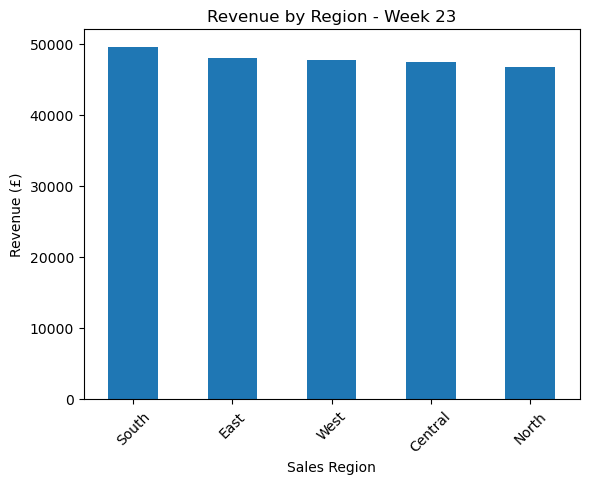

In [24]:
# 1. Bar plot - weekly revenue trends by region 
weekly_revenue.plot(kind='bar',x='sales_region',y='revenue',legend=False)
plt.title('Revenue by Region - Week 23')
plt.xlabel('Sales Region')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.show()

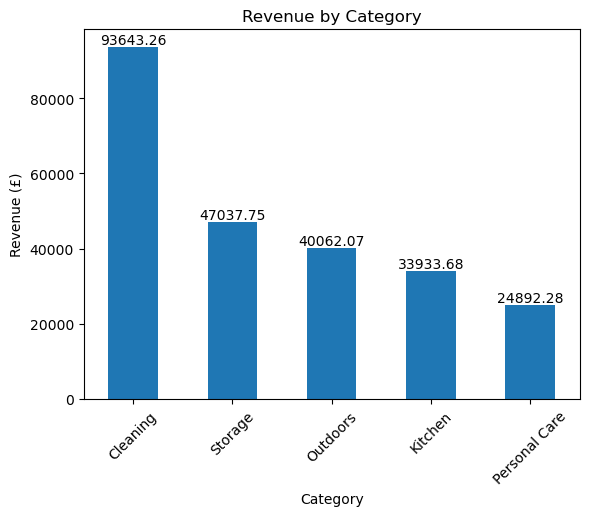

In [25]:
# 2. Bar chart - top 5 categories by revenue 

ax = category_perf.plot(kind='bar',x='category', y='revenue', legend=False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  # 2 decimal places
plt.title('Revenue by Category')
plt.ylabel('Revenue (£)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

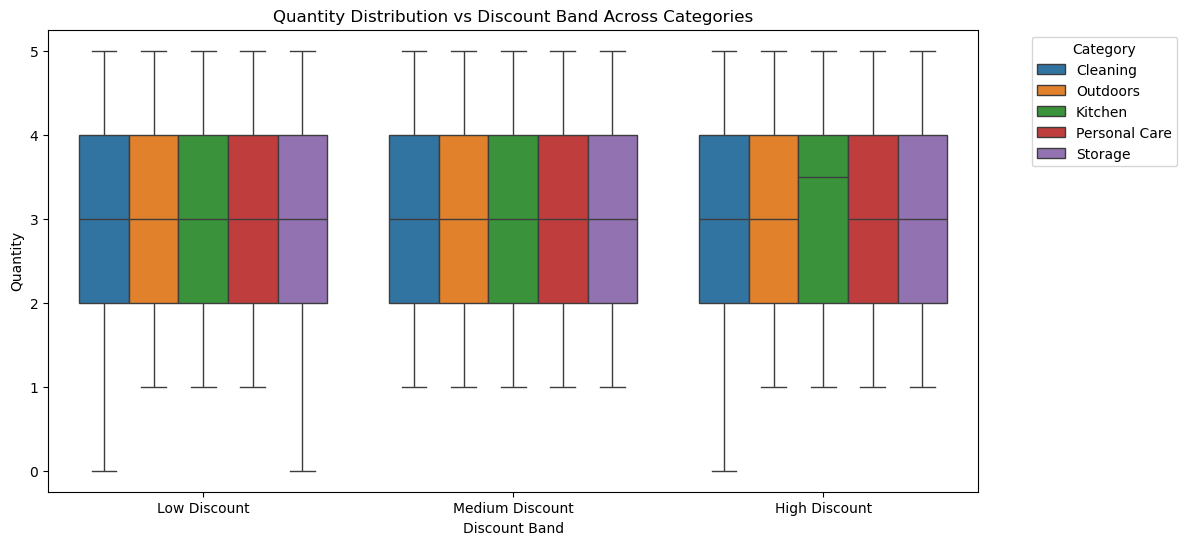

In [26]:
# 3. Boxplot - quantity vs discount across categories 
#Step1: Create discount bands (customize bins as needed)
bins = [-0.01, 0.05, 0.15, 1]   # e.g., 0-5%, 5%-15%, 15%+
labels = ['Low Discount', 'Medium Discount', 'High Discount']

merged_df['discount_band'] = pd.cut(merged_df['discount_applied'], bins=bins, labels=labels)
#Step 2: Plot boxplot of quantity vs discount_band, grouped by category

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='discount_band', y='quantity', hue='category')

plt.title('Quantity Distribution vs Discount Band Across Categories')
plt.xlabel('Discount Band')
plt.ylabel('Quantity')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

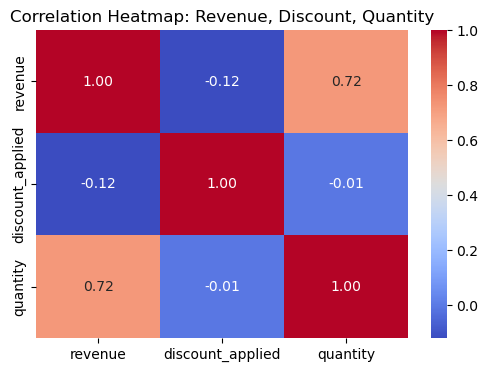

                   revenue  discount_applied  quantity
revenue           1.000000         -0.119384  0.722074
discount_applied -0.119384          1.000000 -0.009987
quantity          0.722074         -0.009987  1.000000


In [27]:
# 4. Heatmap - correlation between revenue, discount, and quantity 
# Select the relevant columns from your dataframe (e.g., merged_df)
corr_data = merged_df[['revenue', 'discount_applied', 'quantity']]

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Revenue, Discount, Quantity')
plt.show()
print(corr_matrix)

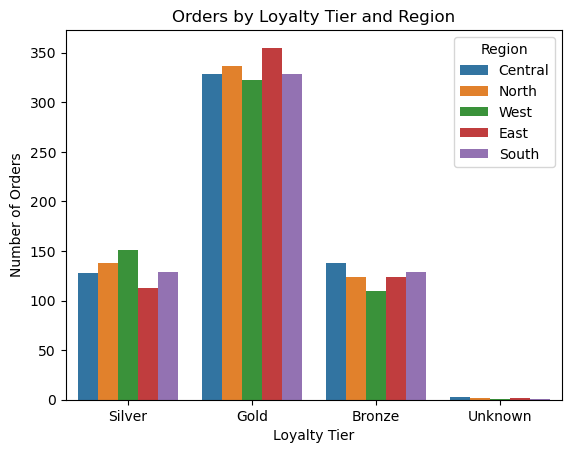

In [28]:
# 5. Countplot - orders by loyalty tier (with hue = region) 
sns.countplot(data=merged_df,x='loyalty_tier',hue='sales_region')
plt.title('Orders by Loyalty Tier and Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.legend(title='Region')
plt.show()

delivery_status  Cancelled  Delayed  Delivered
price_band                                    
High                   262      545        581
Low                    108      187        195
Medium                 219      437        455


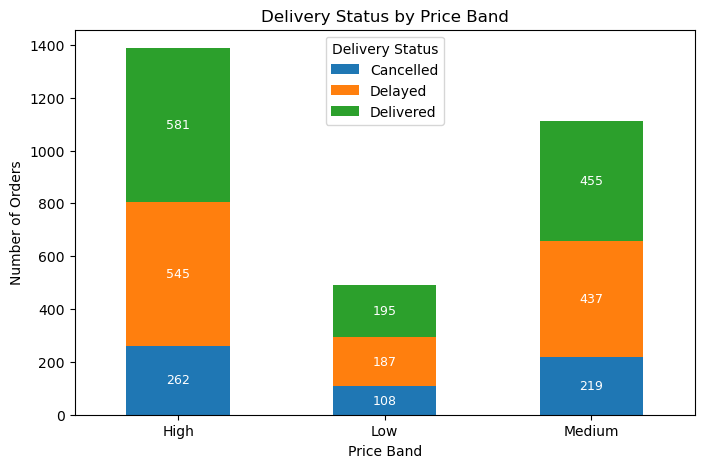

In [29]:
# 6. Stacked bar for delivery status by price band
delivery_counts = merged_df.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)

print(delivery_counts)
ax = delivery_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status')
plt.xticks(rotation=0)

# Add data labels inside each segment
for i, price_band in enumerate(delivery_counts.index):
    cum_height = 0
    for delivery_status in delivery_counts.columns:
        height = delivery_counts.loc[price_band, delivery_status]
        if height > 0:
            ax.text(i, cum_height + height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=9)
            cum_height += height

plt.show()

## 7. Answer the business Questions 

         category sales_region   revenue
1        Cleaning         East  20018.02
3        Cleaning        South  18887.37
2        Cleaning        North  18766.10
0        Cleaning      Central  18018.84
4        Cleaning         West  17952.93
24        Storage         West  10014.45
21        Storage         East   9604.42
20        Storage      Central   9358.48
23        Storage        South   9345.36
13       Outdoors        South   9327.42
22        Storage        North   8715.05
10       Outdoors      Central   7931.85
14       Outdoors         West   7875.10
12       Outdoors        North   7806.33
8         Kitchen        South   7761.40
11       Outdoors         East   7121.38
6         Kitchen         East   6695.84
9         Kitchen         West   6674.00
5         Kitchen      Central   6518.97
7         Kitchen        North   6283.46
15  Personal Care      Central   5616.16
19  Personal Care         West   5213.34
17  Personal Care        North   5207.55
16  Personal Car

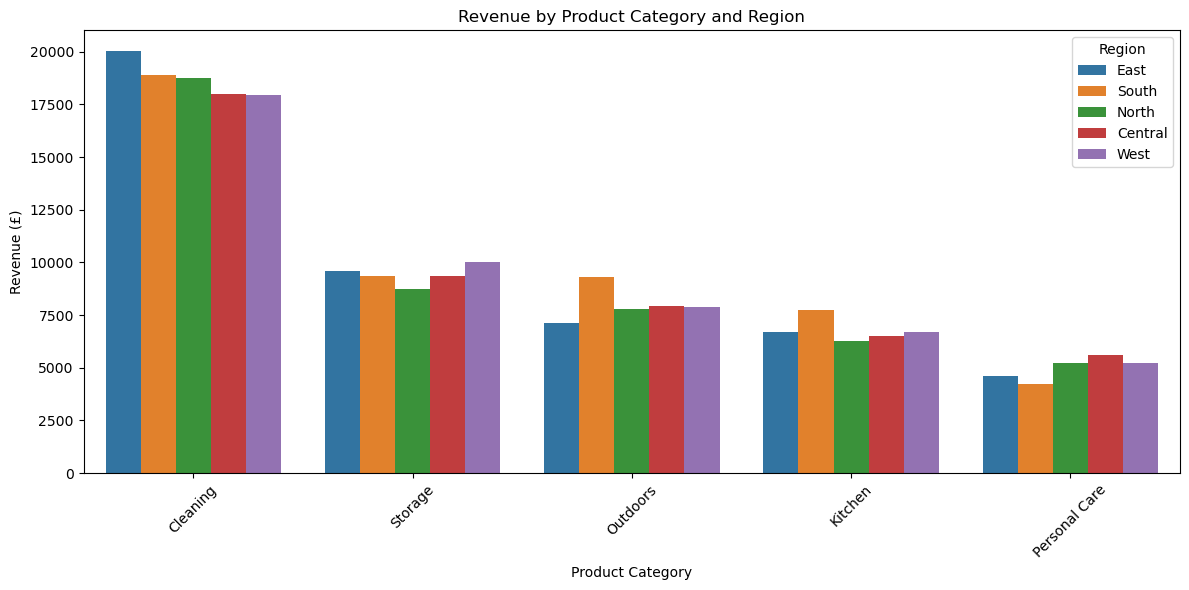

In [30]:
#1. Which product categories drive the most revenue, and in which regions? 
category_regwise_revenue = (merged_df.groupby(['category','sales_region'],as_index=False) ['revenue'].sum()
                                             .sort_values(by='revenue',ascending=False))

category_regwise_revenue['revenue'] = category_regwise_revenue['revenue'].round(2)

print(category_regwise_revenue)

plt.figure(figsize=(12, 6))
sns.barplot(data=category_regwise_revenue, x='category', y='revenue', hue='sales_region')

plt.title('Revenue by Product Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [31]:
#4. Do discounts lead to more items sold? 
discount_summary = merged_df.groupby('discount_band',observed=True)['quantity'].mean().reset_index()
discount_summary['quantity'] = discount_summary['quantity'].round(0).astype(int)
print(discount_summary)

     discount_band  quantity
0     Low Discount         3
1  Medium Discount         3
2    High Discount         3


  loyalty_tier    revenue
1         Gold  136283.85
2       Silver   52138.90
0       Bronze   49053.66
3      Unknown     767.27


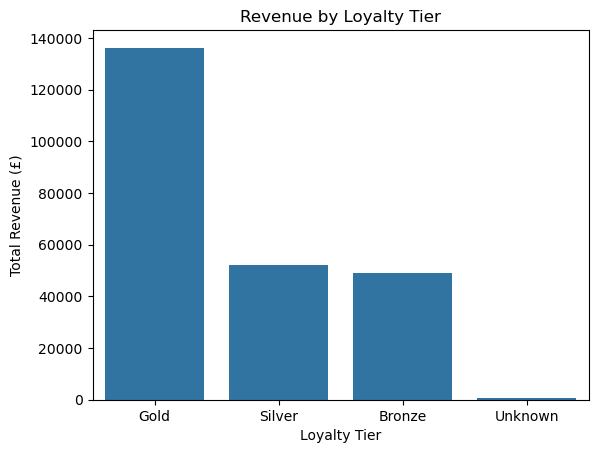

In [32]:
#5. Which loyalty tier generates the most value? 

loyalty_revenue = merged_df.groupby('loyalty_tier', observed=True)['revenue'].sum().reset_index()
loyalty_revenue['revenue'] = loyalty_revenue['revenue'].round(2)
loyalty_revenue = loyalty_revenue.sort_values(by='revenue', ascending=False)
print(loyalty_revenue)

sns.barplot(data=loyalty_revenue, x='loyalty_tier', y='revenue', order=loyalty_revenue['loyalty_tier'])
plt.title('Revenue by Loyalty Tier')
plt.ylabel('Total Revenue (£)')
plt.xlabel('Loyalty Tier')
plt.show()

In [33]:
#6. Are certain regions struggling with delivery delays?
#• Delivery performance by region 
delivery_region = merged_df.groupby(['sales_region','delivery_status']).size().reset_index(name='count')
delivery_region_pivot = delivery_region.pivot_table(index='sales_region',columns='delivery_status',
                                                values='count') 
print(delivery_region_pivot)
print(" ")
delivery_region_pivot['Total'] = delivery_region_pivot.sum(axis=1)
delivery_region_pivot['Delayed_pct'] = (delivery_region_pivot['Delayed'] / delivery_region_pivot['Total']) * 100
delivery_region_pivot['Delayed_pct'] = delivery_region_pivot['Delayed_pct'].round(2)
print(delivery_region_pivot[['Delayed', 'Total', 'Delayed_pct']])


delivery_status  Cancelled  Delayed  Delivered
sales_region                                  
Central              125.0    235.0      242.0
East                  98.0    251.0      251.0
North                117.0    236.0      251.0
South                116.0    230.0      249.0
West                 133.0    217.0      238.0
 
delivery_status  Delayed  Total  Delayed_pct
sales_region                                
Central            235.0  602.0        39.04
East               251.0  600.0        41.83
North              236.0  604.0        39.07
South              230.0  595.0        38.66
West               217.0  588.0        36.90


   signup_month     revenue  quantity  unique_orders
0       2024-07  17487.3730       635            221
1       2024-08  23753.8100       857            275
2       2024-09  18603.8720       723            239
3       2024-10  22479.3110       825            275
4       2024-11  22114.6940       816            273
5       2024-12  22525.7615       852            297
6       2025-01  17567.5130       672            235
7       2025-02  23690.2700       875            277
8       2025-03  19789.6540       727            240
9       2025-04  15235.6920       598            197
10      2025-05  15958.9135       593            205
11      2025-06  17038.6615       646            210
12      2025-07   1998.1560        78             21


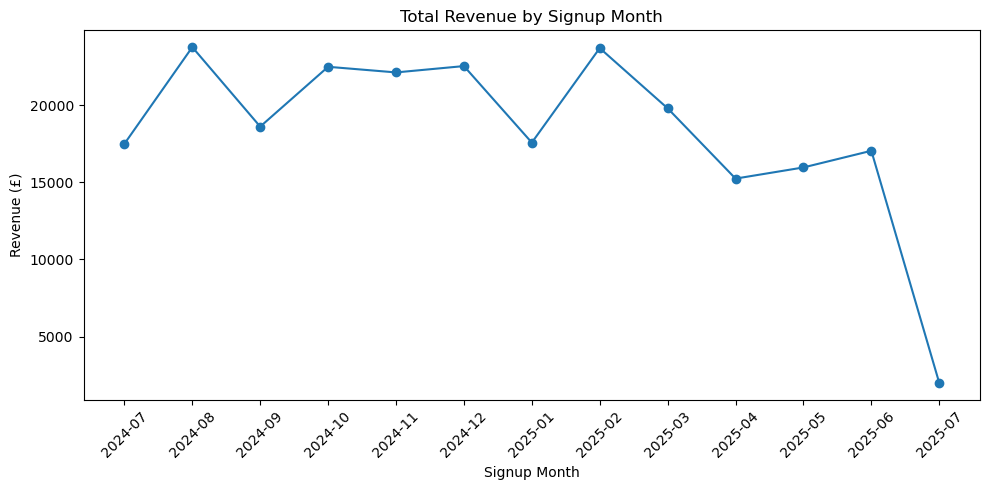

In [34]:
#7. Do customer signup patterns influence purchasing activity? 
# Extract signup year-month
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')

# Group by signup_month and aggregate revenue and quantity
signup_purchase = merged_df.groupby('signup_month').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'order_id': pd.Series.nunique  # unique orders count
}).reset_index()

signup_purchase.rename(columns={'order_id': 'unique_orders'}, inplace=True)

#
print(signup_purchase)

plt.figure(figsize=(10,5))
plt.plot(signup_purchase['signup_month'].astype(str), signup_purchase['revenue'], marker='o')
plt.title('Total Revenue by Signup Month')
plt.xlabel('Signup Month')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

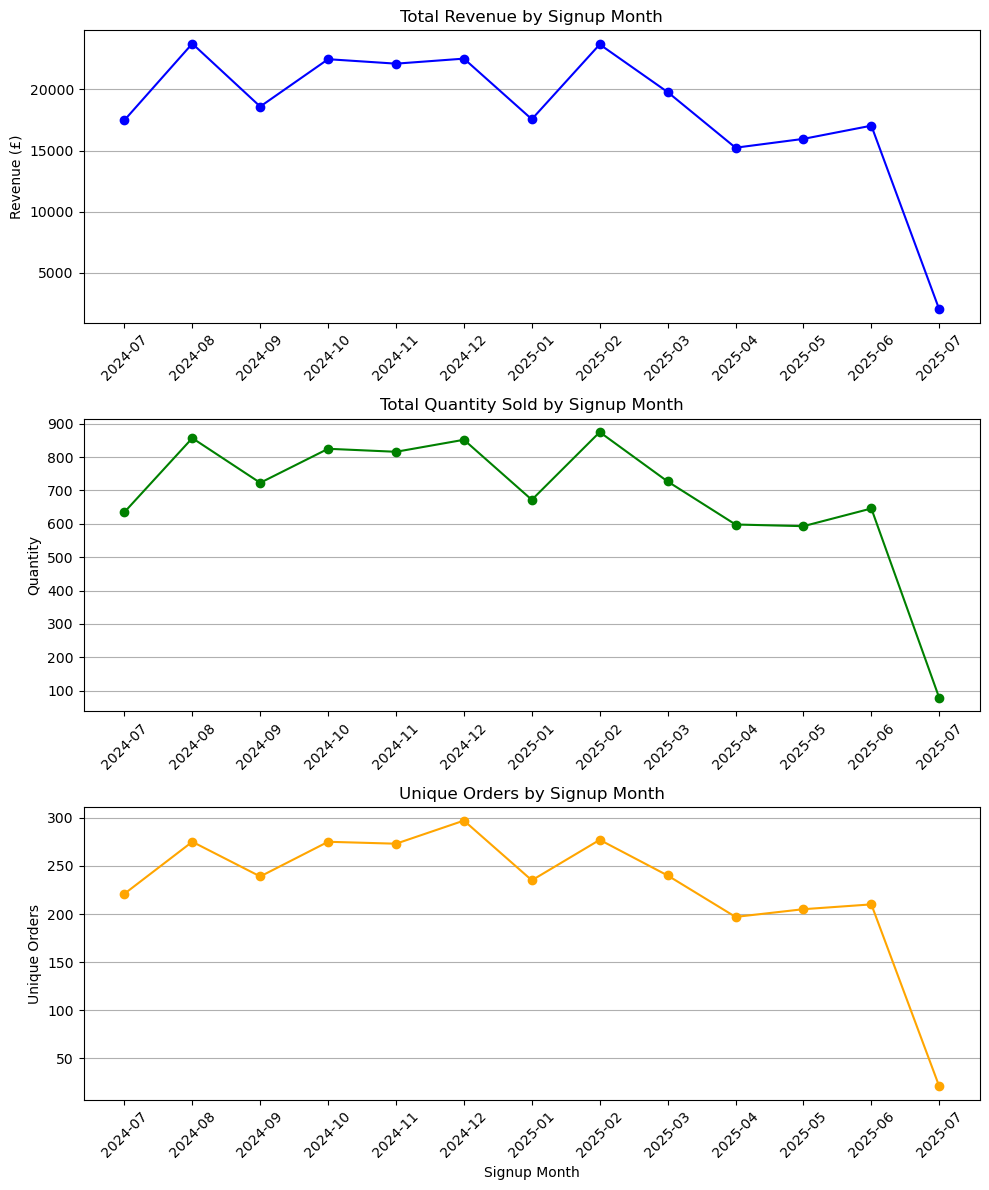

In [35]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

months = signup_purchase['signup_month'].astype(str)

# Revenue plot
axs[0].plot(months, signup_purchase['revenue'], marker='o', color='blue')
axs[0].set_title('Total Revenue by Signup Month')
axs[0].set_ylabel('Revenue (£)')
axs[0].grid(True, axis='y')

# Quantity plot
axs[1].plot(months, signup_purchase['quantity'], marker='o', color='green')
axs[1].set_title('Total Quantity Sold by Signup Month')
axs[1].set_ylabel('Quantity')
axs[1].grid(True, axis='y')

# Unique Orders plot
axs[2].plot(months, signup_purchase['unique_orders'], marker='o', color='orange')
axs[2].set_title('Unique Orders by Signup Month')
axs[2].set_ylabel('Unique Orders')
axs[2].set_xlabel('Signup Month')
axs[2].grid(True, axis='y')

# Set ticks and labels on all subplots
ticks = range(len(months))
for ax in axs:
    ax.set_xticks(ticks)
    ax.set_xticklabels(months, rotation=45)
    ax.tick_params(axis='x', labelbottom=True)

plt.tight_layout()
plt.show()

## 8. Optional Stretch Task 

In [36]:
# Customers who placed an order within 14 days 
# Calculate difference in days between order_date and signup_date
merged_df['days_since_signup'] = (merged_df['order_date'] - merged_df['signup_date']).dt.days

# Filter orders placed within 14 days of signup
orders_within_14_days = merged_df[merged_df['days_since_signup'] <= 14]

# Optionally, get unique customers who placed such orders
customers_within_14_days = orders_within_14_days['customer_id'].unique()

print(f"Number of customers who ordered within 14 days: {len(customers_within_14_days)}")

Number of customers who ordered within 14 days: 44


In [37]:
# Customers who received a discount > 20% 
high_discount_df = merged_df[merged_df['discount_applied'] > 0.20]

high_discount_df 

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month,discount_band,days_since_signup


In [38]:
# Flag mismatches between sales region and customer region
merged_df["region_match"] = merged_df["sales_region"].str.strip().str.lower() == \
                        merged_df["customer_region"].str.strip().str.lower()

# Create a mismatch-only view for review
region_mismatches = merged_df[~merged_df["region_match"]][
    ["customer_id", "sales_region", "customer_region"]
]

# Save mismatches for review
#region_mismatches.to_csv("region_mismatches.csv", index=False)

print(f"Total mismatches found: {len(region_mismatches)}")
print(region_mismatches.head())

Total mismatches found: 2409
  customer_id sales_region customer_region
0      C00397      Central           North
2      C00492        North         Central
4      C00495         West         Central
8      C00076      Central           North
9      C00330        South            West
